# Nonlinear Benchmark Workshop Datasets

> Fill in a module description here

In [ ]:
#| default_exp workshop

In [ ]:
#| export
from sysbench_loader.core import *
import nonlinear_benchmarks
from nonlinear_benchmarks.utilities import Input_output_data
from pathlib import Path
import shutil

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
tmp_dir = Path('./tmp')

## Wiener Hammerstein Dataset

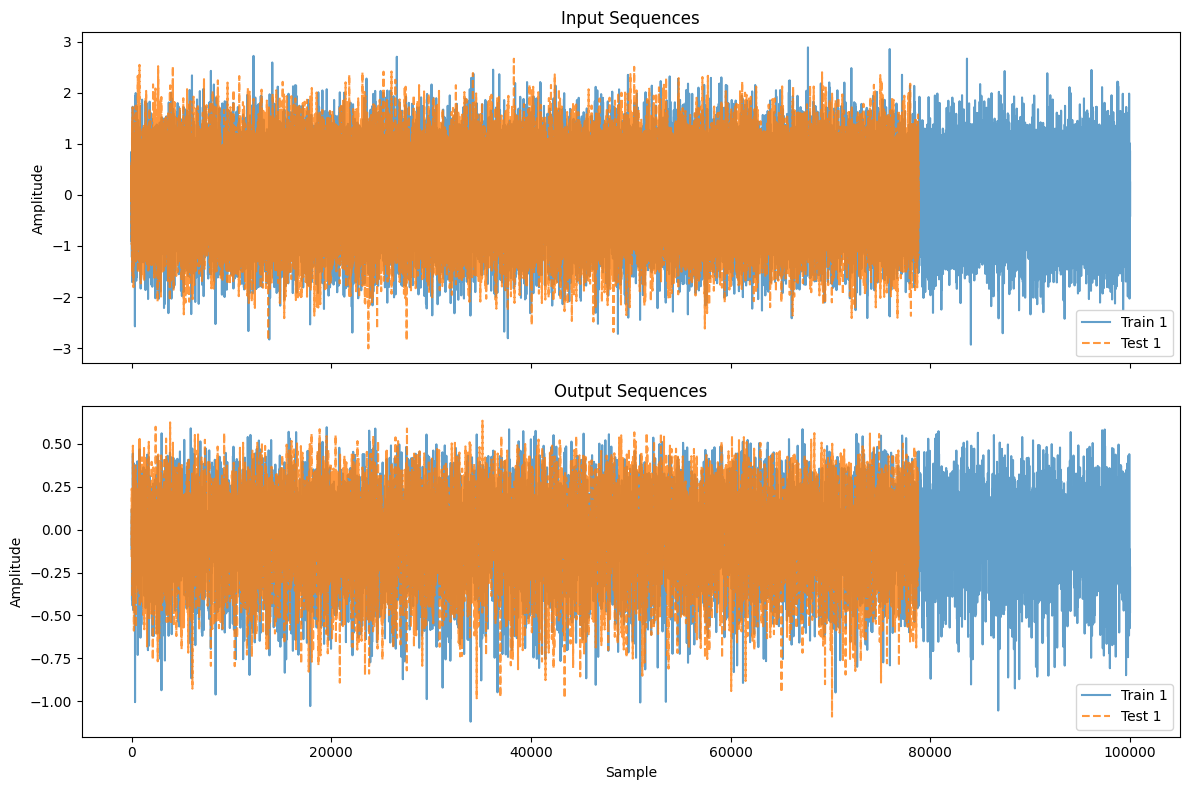

In [ ]:
def plot_workshop_data(dataset_function,max_sequences=3):
    train_val, test = dataset_function(always_return_tuples_of_datasets=True)
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    # Plot training/validation data
    for i, data in enumerate(train_val[:max_sequences]):
        axs[0].plot(data.u, alpha=0.7, label=f'Train {i+1}')
        axs[1].plot(data.y, alpha=0.7, label=f'Train {i+1}')

    # Plot test data
    for i, data in enumerate(test[:max_sequences]):
        axs[0].plot(data.u, ls='--', alpha=0.8, label=f'Test {i+1}')
        axs[1].plot(data.y, ls='--', alpha=0.8, label=f'Test {i+1}')

    axs[0].set_title('Input Sequences')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()

    axs[1].set_title('Output Sequences')
    axs[1].set_xlabel('Sample')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()

    plt.tight_layout()
plot_workshop_data(nonlinear_benchmarks.WienerHammerBenchMark)

In [ ]:
#| export
def wiener_hammerstein(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 80_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.WienerHammerBenchMark(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
wiener_hammerstein(tmp_dir / 'wh' )
wiener_hammerstein(tmp_dir / 'wh' ,save_train_valid=True)

## Silverbox Dataset

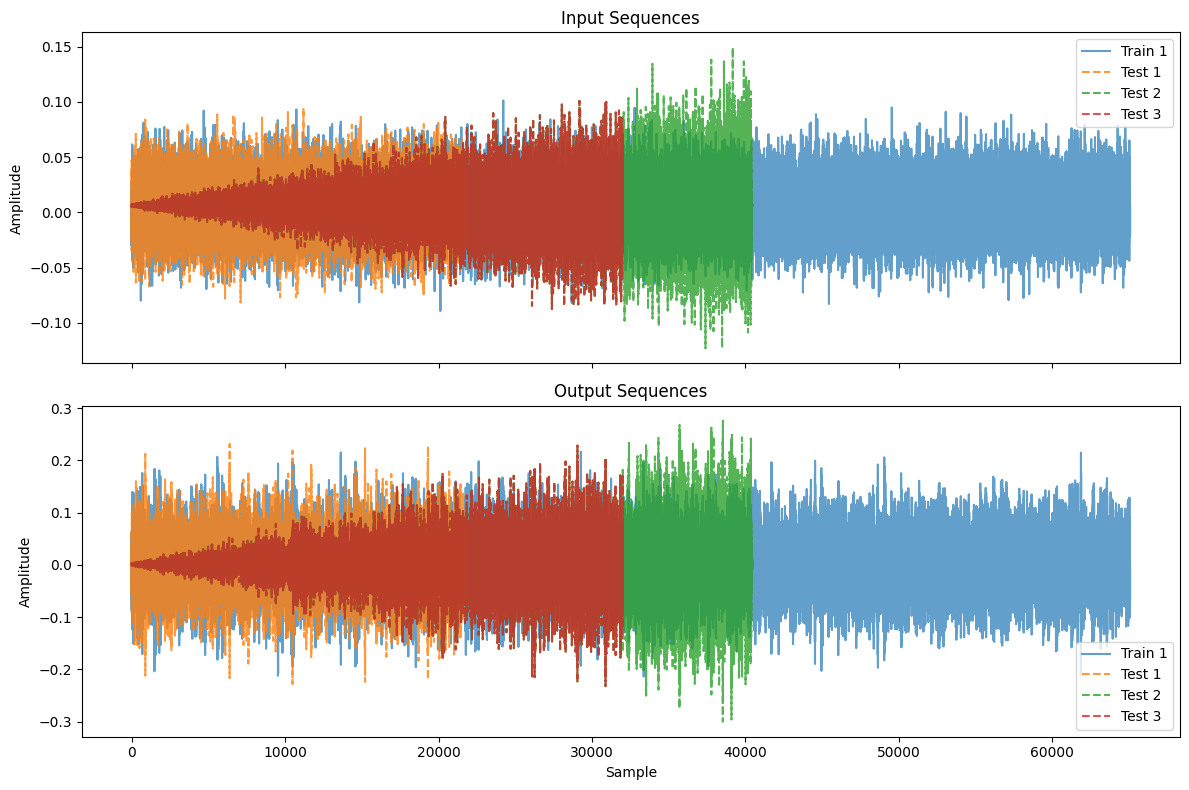

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Silverbox)

In [ ]:
#| export
def silverbox(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 50_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.Silverbox(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
silverbox(tmp_dir / 'silverbox')

## Cascaded Tanks Dataset

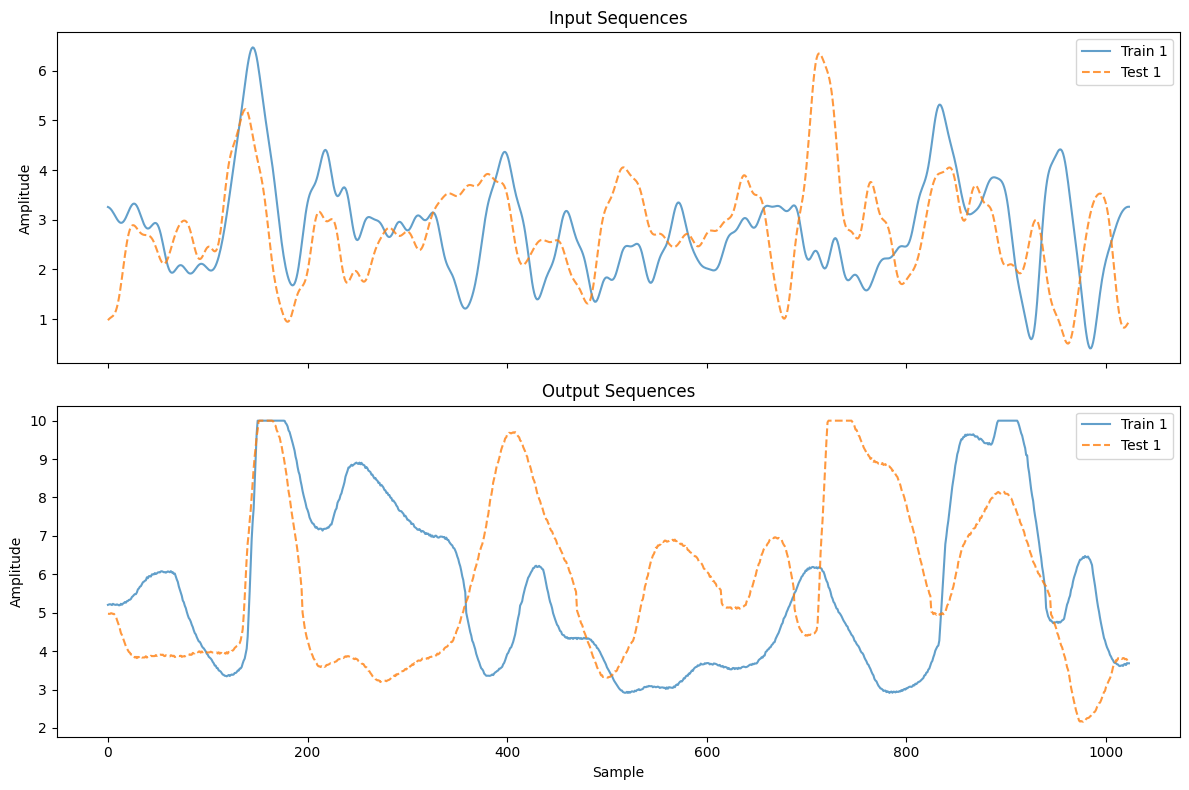

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Cascaded_Tanks) 

In [ ]:
#| export
def cascaded_tanks(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 160 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.Cascaded_Tanks(force_download=force_download)
    train = train_val[split_idx:]
    valid = train_val[:split_idx]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
cascaded_tanks(tmp_dir  / 'cascaded_tanks' )

## EMPS Dataset

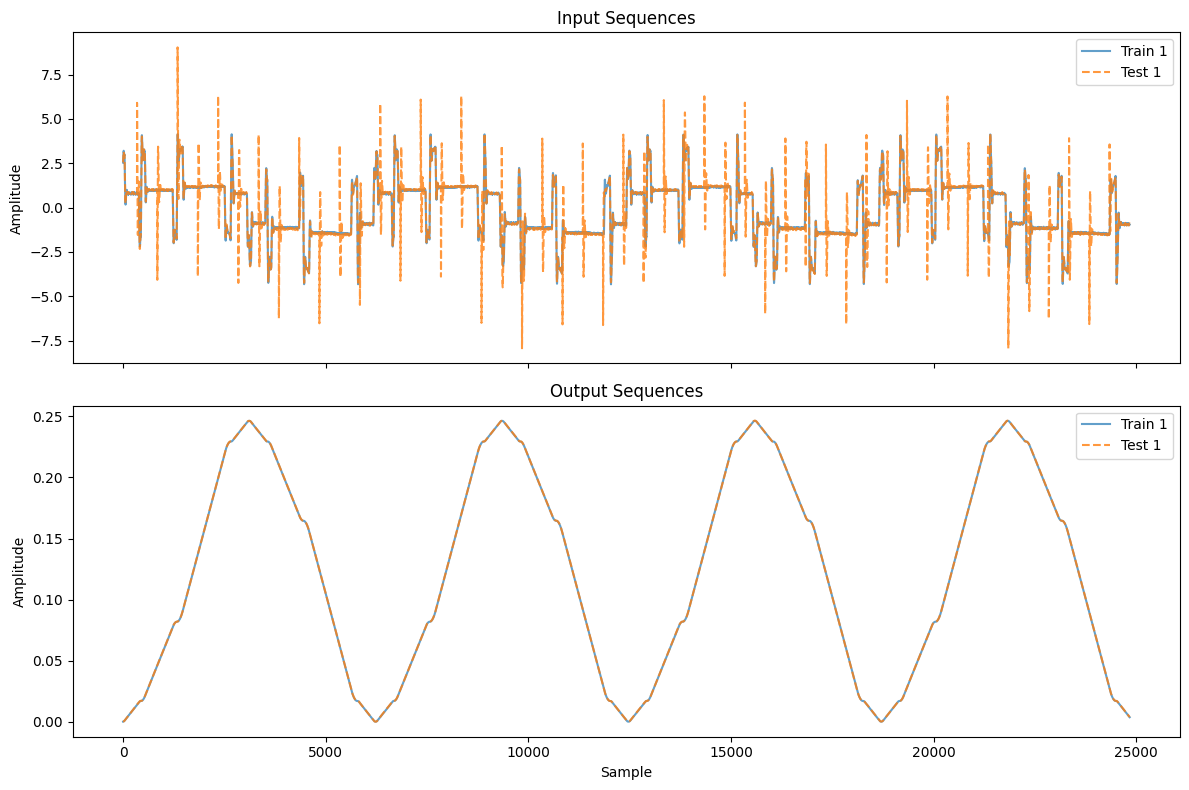

In [ ]:
plot_workshop_data(nonlinear_benchmarks.EMPS)

In [ ]:
#| export
def emps(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 18_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.EMPS(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
emps(tmp_dir  / 'emps')

## Noisy Wiener Hammerstein

In [ ]:
#| export
from scipy.io import loadmat
def noisy_wh(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False # save unsplitted train and valid datasets in 'train_valid' subdirectory
):
    'the wiener hammerstein dataset with process noise'

    #extract raw .mat files, to preserve filenames necessary for train, valid split
    matfiles = nonlinear_benchmarks.not_splitted_benchmarks.WienerHammerstein_Process_Noise(data_file_locations=True,train_test_split=False,force_download=force_download)

    for file in matfiles:
        f_path = Path(file)
        save_path = Path(save_path)

        if 'Test' in f_path.stem:
            hdf_path = save_path / 'test'
        elif 'Combined' in f_path.stem:
            hdf_path = save_path / 'valid'
        else:
            hdf_path = save_path / 'train'

        out = loadmat(f_path)
        _,u,y,fs = out['dataMeas'][0,0]
        fs = fs[0,0]
        for idx,(ui,yi) in enumerate(zip(u.T,y.T)):
            iodata = Input_output_data(u=ui,y=yi, sampling_time=1/fs)
            fname = f'{f_path.stem}_{idx+1}'
            iodata_to_hdf5(iodata,hdf_path,fname)
    if save_train_valid:
        #copy train and valid files to train_valid directory
        for d in ['train','valid']:
            for f in (Path(save_path)/d).glob('*.hdf5') :
                shutil.copy2(f, (p:=Path(save_path)/'train_valid').mkdir(exist_ok=True) or p)


In [ ]:
noisy_wh(tmp_dir / 'noisy_wh' )

## Parallel Wienerhammerstein

In [ ]:
#ToDo

## F16

In [ ]:
#ToDo

## Coupled Electric Drives

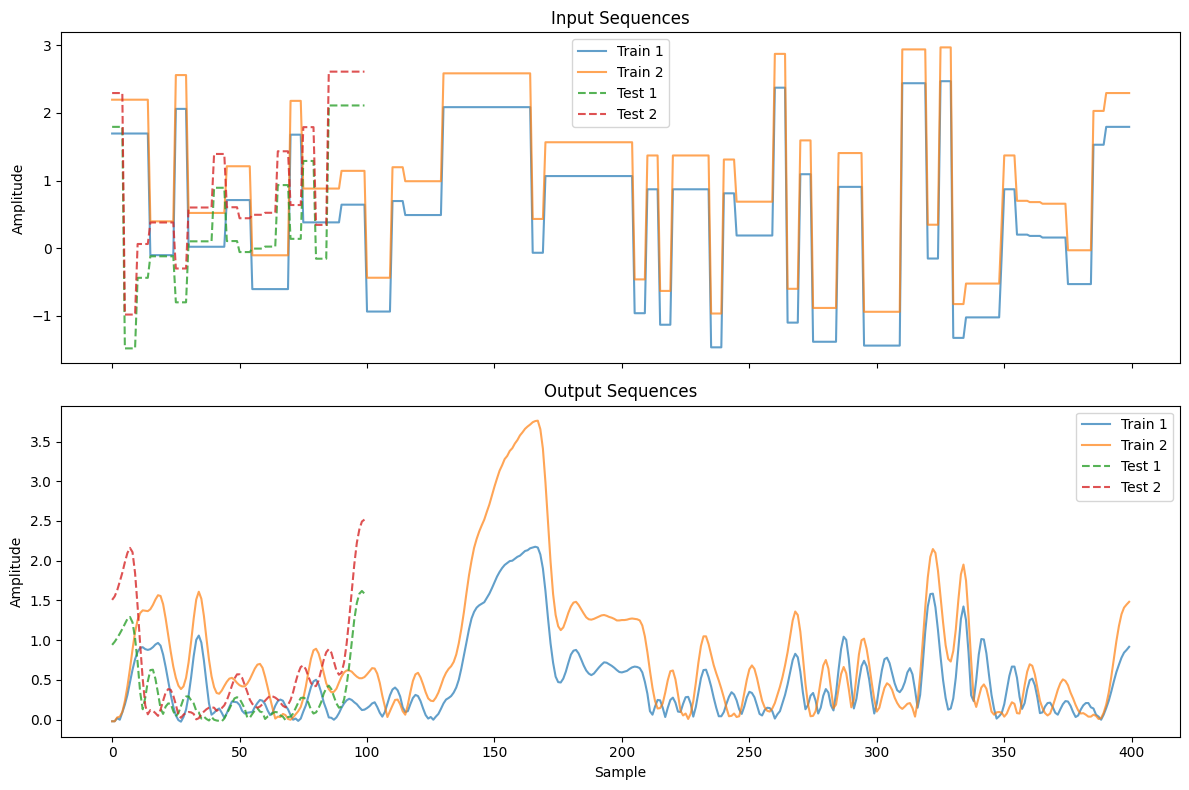

In [ ]:
plot_workshop_data(nonlinear_benchmarks.CED)

In [ ]:
#| export
def ced(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = False, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 300 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.CED(force_download=force_download,always_return_tuples_of_datasets=True)
    train = tuple(x[:split_idx] for x in train_val)
    valid = tuple(x[split_idx:] for x in train_val)

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
ced(tmp_dir / 'ced' )

In [ ]:
#| hide
#clean temporary hdf5 file
#shutil.rmtree(tmp_dir)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()